# 对一副二值图像进行膨胀、腐蚀、开、闭操作

图像的膨胀（Dilation）和腐蚀（Erosion）是两种基本的形态学运算，主要用来寻找图像中的极大区域和极小区域。
其中膨胀类似于“领域扩张”，将图像中的高亮区域或白色部分进行扩张，其运行结果图比原图的高亮区域更大；
腐蚀类似于“领域被蚕食”，将图像中的高亮区域或白色部分进行缩减细化，其运行结果图比原图的高亮区域更小。



In [200]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [201]:
def erosion_dilation(pic):
    plt.figure(figsize=(16,16))


    src = cv2.imread(pic , cv2.IMREAD_UNCHANGED)  #将图像二值化，不做阈值处理

    kernel = np.ones((2,2) , np.uint8) #设置卷积核5*5

    erosion = cv2.erode(src , kernel) #腐蚀

    dilation = cv2.dilate(src , kernel) #膨胀


    
    plt.subplot(131)
    plt.title('膨胀')
    plt.imshow(dilation)  #效果展示
    plt.axis('off')
    
    plt.subplot(132)
    plt.title('图像二值化')
    plt.imshow(src)  #效果展示
    plt.axis('off')
    
    plt.subplot(133)
    plt.title('腐蚀')
    plt.imshow(erosion) #腐蚀后 
    plt.axis('off')

    plt.show()



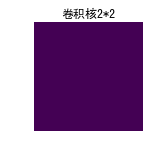

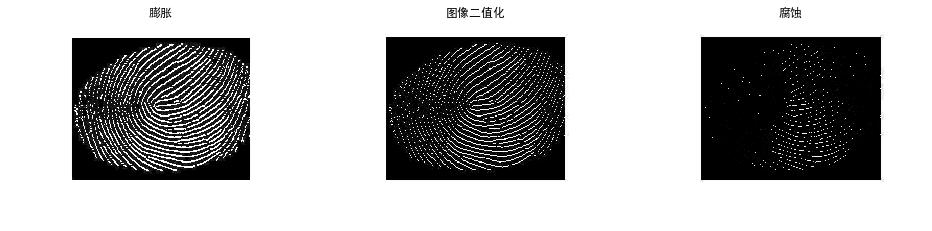

In [202]:
pic1 = 'D:Pictures/pengzhang.jpg'
kernel = np.ones((2,2) , np.uint8) #设置卷积核5*5
plt.figure(figsize=(2,2))
plt.title('卷积核2*2')
plt.axis('off')
plt.imshow(kernel
          )
plt.show()
erosion_dilation(pic1)

In [203]:
def erosion_before_dilation(pic,c): #先膨胀再腐蚀  闭操作
    plt.figure(figsize=(16,12))

    src = cv2.imread(pic , cv2.IMREAD_UNCHANGED)  #将图像二值化，不做阈值处理

    kernel = np.ones((c,c) , np.uint8) #设置卷积核5*5
    
    bi = cv2.morphologyEx(src,cv2.MORPH_CLOSE,kernel)



    plt.subplot(121)
    plt.title('图像二值化')
    plt.imshow(src)  #效果展示
    plt.axis('off') 
    
    plt.subplot(122)
    plt.title('先膨胀后腐蚀')
    plt.imshow(bi)  #效果展示
    plt.axis('off')

    plt.show()

def erosion_after_dilation(pic,c): #先腐蚀再膨胀
    plt.figure(figsize=(20,16))

    src = cv2.imread(pic , cv2.IMREAD_UNCHANGED)  #将图像二值化，不做阈值处理

    kernel = np.ones((c,c) , np.uint8) #设置卷积核5*5

    bi = cv2.morphologyEx(src,cv2.MORPH_OPEN,kernel)

    plt.subplot(121)
    plt.title('图像二值化')
    plt.imshow(src)  #效果展示
    plt.axis('off')
    
    plt.subplot(122)
    plt.title('先腐蚀后膨胀')
    plt.imshow(bi)  #效果展示
    plt.axis('off')

    plt.show()


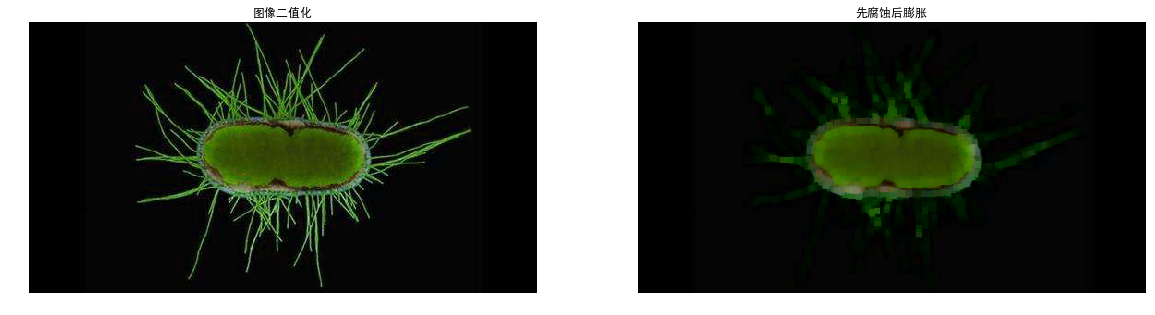

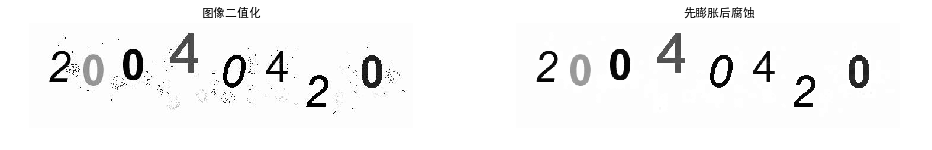

In [204]:
pic1 = 'D:Pictures/xijun.jpg'
pic2 = 'D:Pictures/quhei.jpg'

erosion_after_dilation(pic1,6)  #6*6的卷积核
erosion_before_dilation(pic2,3)  #3*3的卷积核

# 图像的开操作即先腐蚀后膨胀，适合去毛边，去噪；闭操作即先膨胀后腐蚀，适合去黑点。（选择合适大小的卷积核）